In [1]:
import pandas as pd

In [2]:
true = pd.read_csv('../dataset/true.csv')

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
true.shape

(21417, 4)

In [5]:
fake = pd.read_csv('../dataset/fake.csv')
fake.shape

(23481, 4)

In [6]:
true['label'] = 1
fake['label'] = 0

In [7]:
# Use the the first 20000 data of true and fake dataset for building the model.
frames = [true.loc[:20000][:], fake.loc[:20000][:]]

In [8]:
df = pd.concat(frames)

In [9]:
df.shape

(40002, 5)

In [10]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
df.tail()

,title,text,subject,date,label
19996,WHY IS THE MEDIA HIDING This Endorsement?…KKK ...,It s time for the media to start doing their j...,left-news,"Sep 10, 2016",0
19997,IF HILLARY IS ELECTED And Becomes Too Sick To ...,The applications for White House interns just ...,left-news,"Sep 10, 2016",0
19998,BLACK RESIDENTS NOT HAPPY After Street Artist ...,The Obama s have convinced Black communities a...,left-news,"Sep 9, 2016",0
19999,THESE “POLLS” DON’T LIE! HILLARY PLANS HUGE Bl...,The way Trump is packing in thousands of suppo...,left-news,"Sep 9, 2016",0
20000,FEMALE SAILOR FACES DISCIPLINE By US Navy For ...,"***WARNING***If you watch this video, you will...",left-news,"Sep 9, 2016",0


In [12]:
X = df. drop('label', axis=1)
y = df['label']

In [13]:
df = df.dropna()
df2 = df.copy()

In [14]:
df2.reset_index(inplace=True)
df2.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
df2.shape

(40002, 6)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17068\3810664231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sns.countplot(x='label', data=dataFile, palette='hls')


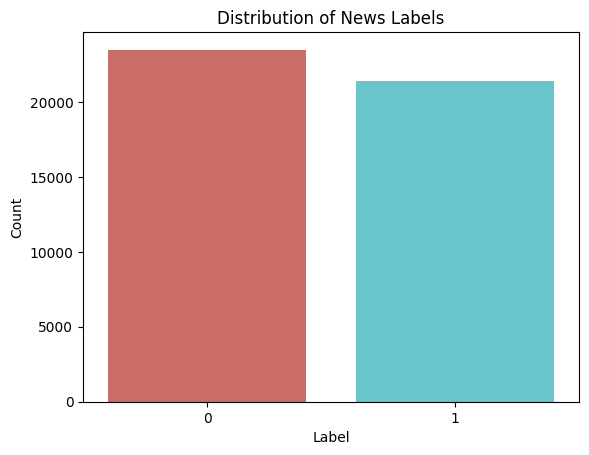

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
combined_df = pd.concat([true, fake], ignore_index=True)
def create_distribution(dataFile):
    return sns.countplot(x='label', data=dataFile, palette='hls')

create_distribution(combined_df)
plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Data Preprocessing

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [18]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [20]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [21]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17068\84697292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=combined_df, order=combined_df['subject'].value_counts().index, palette='Set2')


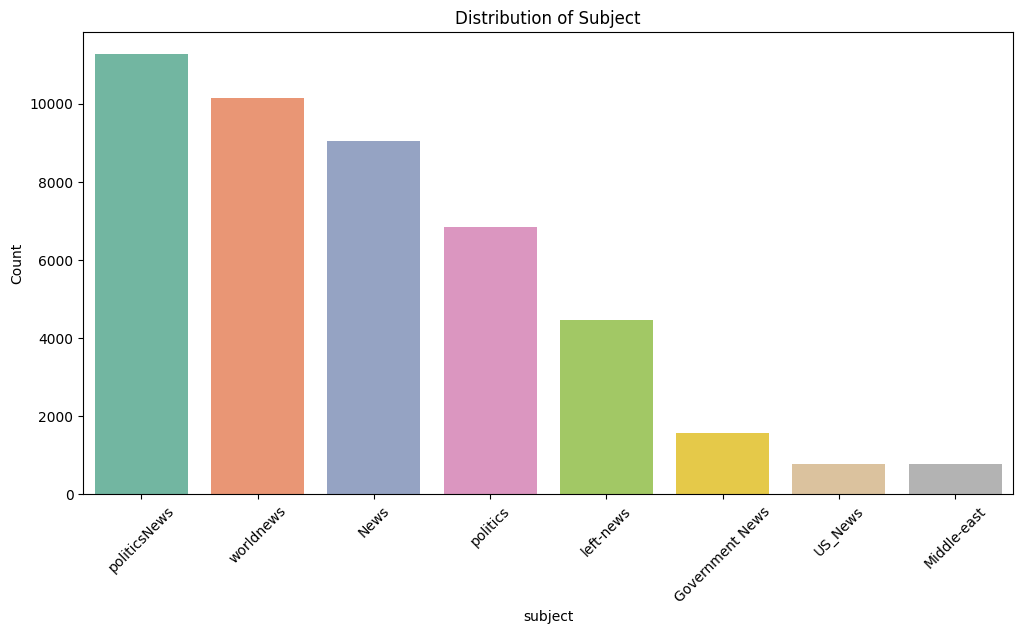

In [22]:
# Distribution of Subject
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=combined_df, order=combined_df['subject'].value_counts().index, palette='Set2')
plt.title('Distribution of Subject')
plt.xlabel('subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Model building - Passive Aggresive Classifier

In [23]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=2000)

In [25]:
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import classification_report
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
report = classification_report(y_test, pred)
print(report)

accuracy:   0.994
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4017
           1       0.99      1.00      0.99      3984

    accuracy                           0.99      8001
   macro avg       0.99      0.99      0.99      8001
weighted avg       0.99      0.99      0.99      8001



In [26]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


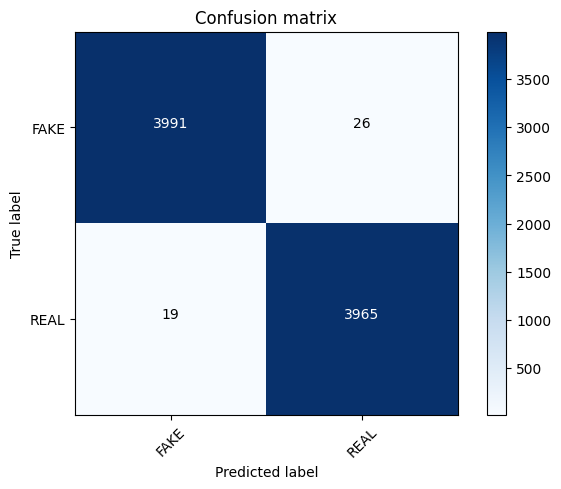

In [27]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Validate on an unseen datapoint

In [28]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)

In [29]:
val = tfidf_v.transform([review]).toarray()

In [30]:
classifier.predict(val)

array([0], dtype=int64)

## Save model and vectorizer

In [31]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

#### Load model and vectorizer to predict the previous datapoint

In [32]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
test_pred = joblib_model.predict(val_pkl)

if test_pred == 0:
    print("Fake News!")
else:
    print("Real News")

Fake News!


RANDOM FOREST


accuracy:   0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4017
           1       1.00      1.00      1.00      3984

    accuracy                           1.00      8001
   macro avg       1.00      1.00      1.00      8001
weighted avg       1.00      1.00      1.00      8001

Confusion matrix, without normalization


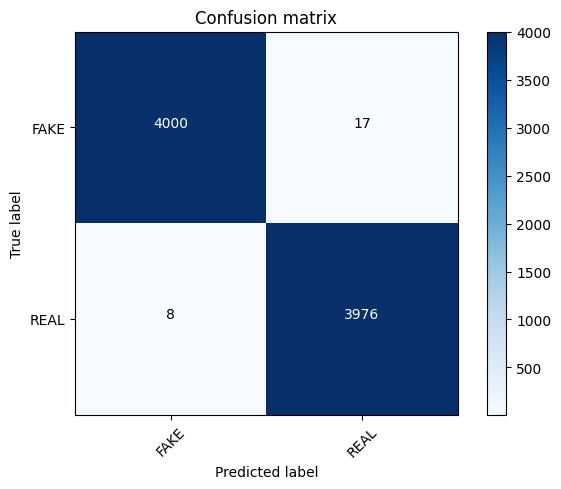

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=0)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
rf_score = metrics.accuracy_score(y_test, rf_pred)
print("accuracy:   %0.3f" % rf_score)

# Calculate precision, recall, f1-score and support
report = classification_report(y_test, rf_pred)
print(report)

# Plot the confusion matrix
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
plot_confusion_matrix(rf_cm, classes=['FAKE', 'REAL'])


In [34]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Specify the path and name for the model
model_path = r'D:\MINOR PROJECT\Fake-News-Detection-main\model\randomforest.pkl'

# Save the model to the specified path with the name "randomforest.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(rf_classifier, f)

# Now you can load the saved model using pickle.load() when needed


LOIGISTIC REGRESSION

accuracy:   0.986
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4017
           1       0.98      0.99      0.99      3984

    accuracy                           0.99      8001
   macro avg       0.99      0.99      0.99      8001
weighted avg       0.99      0.99      0.99      8001

Confusion matrix, without normalization


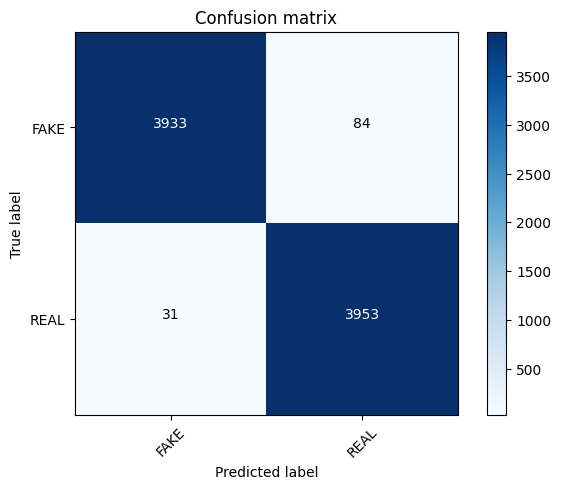

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

# Create a Logistic Regression Classifier
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
logreg_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
logreg_score = metrics.accuracy_score(y_test, logreg_pred)
print("accuracy:   %0.3f" % logreg_score)
# Calculate precision, recall, f1-score and support
report = classification_report(y_test, logreg_pred)
print(report)

# Plot the confusion matrix
logreg_cm = metrics.confusion_matrix(y_test, logreg_pred)
plot_confusion_matrix(logreg_cm, classes=['FAKE', 'REAL'])


In [36]:
import pickle
from sklearn.linear_model import LogisticRegression

# Assuming 'logreg' is your trained Logistic Regression model

# Save the trained model as a pickle file.
LogisticRegression_model = pickle.dumps(logreg)

# Load the pickled model
logreg_from_pickle = pickle.loads(LogisticRegression_model)

# Assuming X_test is your test data for making predictions
# Use the loaded pickled model to make predictions
predictions = logreg_from_pickle.predict(X_test)

# Specify the path where you want to save the model
path = r'D:\MINOR PROJECT\Fake-News-Detection-main\model\logistic.pkl'

# Save the model to the specified path
with open(path, 'wb') as f:
    pickle.dump(logreg, f)


NAIVE Naive Bayes classifier 

accuracy:   0.946
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      4017
           1       0.93      0.97      0.95      3984

    accuracy                           0.95      8001
   macro avg       0.95      0.95      0.95      8001
weighted avg       0.95      0.95      0.95      8001

Confusion matrix, without normalization


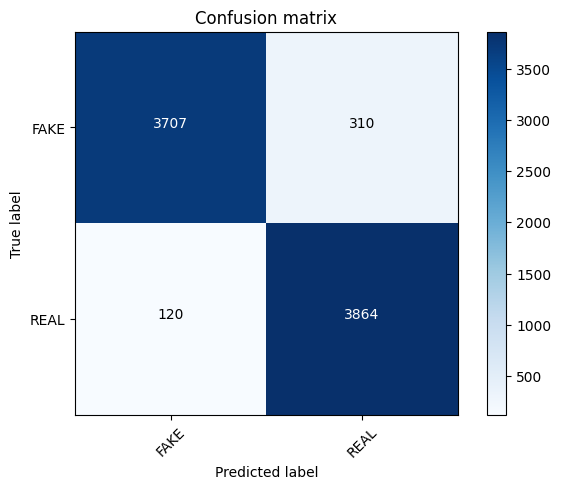

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
nb_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the model
nb_score = metrics.accuracy_score(y_test, nb_pred)
print("accuracy:   %0.3f" % nb_score)

# Calculate precision, recall, f1-score and support
report = classification_report(y_test, nb_pred)
print(report)

# Plot the confusion matrix
nb_cm = metrics.confusion_matrix(y_test, nb_pred)
plot_confusion_matrix(nb_cm, classes=['FAKE', 'REAL'])


SAVE MODEL

In [38]:
import pickle
from sklearn.naive_bayes import GaussianNB

# Assuming 'nb_classifier' is your trained Naive Bayes model

# Save the trained model as a pickle file.
NaiveBayes_model = pickle.dumps(nb_classifier)

# Load the pickled model
nb_classifier_from_pickle = pickle.loads(NaiveBayes_model)

# Assuming X_test is your test data for making predictions
# Use the loaded pickled model to make predictions
predictions = nb_classifier_from_pickle.predict(X_test)

# Specify the path where you want to save the model
path = r'D:\MINOR PROJECT\Fake-News-Detection-main\model\naive_bayes.pkl'

# Save the model to the specified path
with open(path, 'wb') as f:
    pickle.dump(nb_classifier, f)


KNN

accuracy:   0.720
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      4017
           1       0.94      0.47      0.62      3984

    accuracy                           0.72      8001
   macro avg       0.79      0.72      0.70      8001
weighted avg       0.79      0.72      0.70      8001

Confusion matrix, without normalization


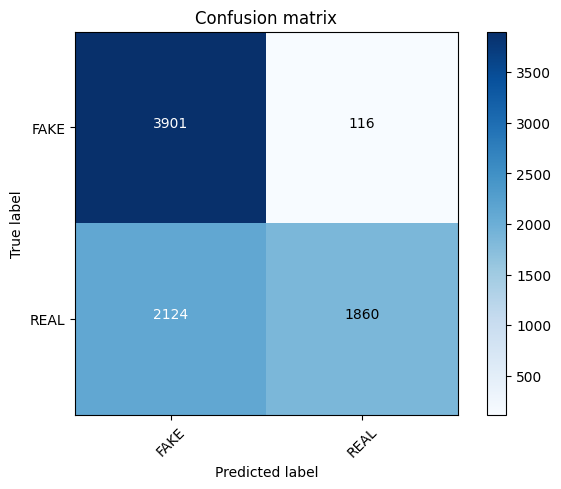

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can choose a different number of neighbors

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model
knn_score = metrics.accuracy_score(y_test, knn_pred)
print("accuracy:   %0.3f" % knn_score)

# Calculate precision, recall, f1-score and support
report = classification_report(y_test, knn_pred)
print(report)

# Plot the confusion matrix
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plot_confusion_matrix(knn_cm, classes=['FAKE', 'REAL'])


SAVE THE MODEL

In [40]:
# Save the trained model as a pickle file.
KNN_model = pickle.dumps(knn_classifier)

# Load the pickled model
knn_from_pickle = pickle.loads(KNN_model)

# Assuming X_test is your test data for making predictions
# Use the loaded pickled model to make predictions
predictions = knn_from_pickle.predict(X_test)

# Specify the path where you want to save the model
path = r'D:\MINOR PROJECT\Fake-News-Detection-main\model\knn_model.pkl'

# Save the model to the specified path
with open(path, 'wb') as f:
    pickle.dump(nb_classifier, f)

DESCISON TREE

accuracy:   0.995
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4017
           1       1.00      0.99      0.99      3984

    accuracy                           0.99      8001
   macro avg       0.99      0.99      0.99      8001
weighted avg       0.99      0.99      0.99      8001

Confusion matrix, without normalization


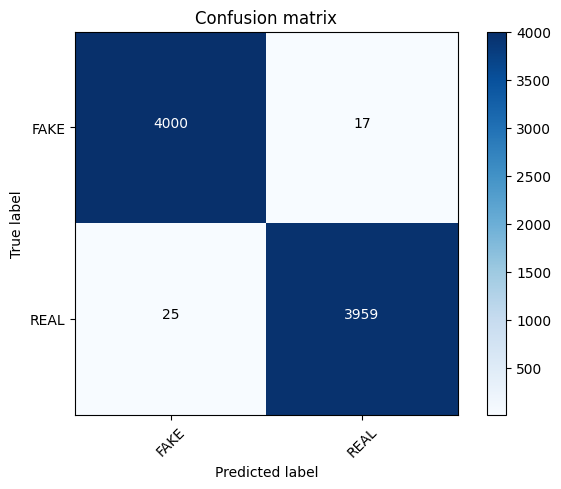

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
dt_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
dt_score = metrics.accuracy_score(y_test, dt_pred)
print("accuracy:   %0.3f" % dt_score)

# Calculate precision, recall, f1-score and support
report = classification_report(y_test, dt_pred)
print(report)

# Plot the confusion matrix
dt_cm = metrics.confusion_matrix(y_test, dt_pred)
plot_confusion_matrix(dt_cm, classes=['FAKE', 'REAL'])


accuracy:   0.994
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4017
           1       0.99      0.99      0.99      3984

    accuracy                           0.99      8001
   macro avg       0.99      0.99      0.99      8001
weighted avg       0.99      0.99      0.99      8001

Confusion matrix, without normalization


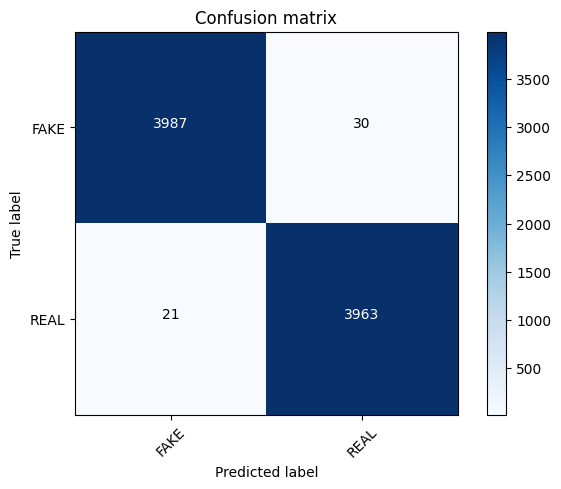

In [42]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Create the individual models
knn = KNeighborsClassifier(n_neighbors=5)
logistic = LogisticRegression()
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier()
passive_aggressive = PassiveAggressiveClassifier()

# Create the ensemble model
voting_classifier = VotingClassifier(
    estimators=[
        ('knn', knn), 
        ('lr', logistic), 
        ('nb', naive_bayes), 
        ('rf', random_forest), 
        ('pa', passive_aggressive)
    ], 
    voting='hard'
)

# Fit the model on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
ensemble_pred = voting_classifier.predict(X_test)

# Calculate the accuracy of the model
ensemble_score = metrics.accuracy_score(y_test, ensemble_pred)
print("accuracy:   %0.3f" % ensemble_score)

# Calculate precision, recall, f1-score and support
report = classification_report(y_test, ensemble_pred)
print(report)

# Plot the confusion matrix
ensemble_cm = metrics.confusion_matrix(y_test, ensemble_pred)
plot_confusion_matrix(ensemble_cm, classes=['FAKE', 'REAL'])


HYBRID

accuracy:   0.992
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4017
           1       0.99      0.99      0.99      3984

    accuracy                           0.99      8001
   macro avg       0.99      0.99      0.99      8001
weighted avg       0.99      0.99      0.99      8001

Confusion matrix, without normalization


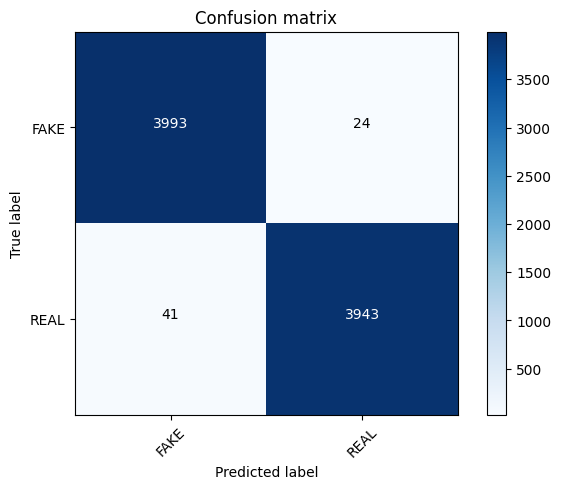

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Create the individual models
logistic = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)

# Create the ensemble model
hybrid_model = VotingClassifier(
    estimators=[
        ('lr', logistic), 
        ('dt', decision_tree), 
        ('knn', knn)
    ], 
    voting='hard'
)

# Fit the model on the training data
hybrid_model.fit(X_train, y_train)

# Make predictions on the test data
hybrid_pred = hybrid_model.predict(X_test)

# Calculate the accuracy of the model
hybrid_score = metrics.accuracy_score(y_test, hybrid_pred)
print("accuracy:   %0.3f" % hybrid_score)

# Calculate precision, recall, f1-score and support
report = classification_report(y_test, hybrid_pred)
print(report)

# Plot the confusion matrix
hybrid_cm = metrics.confusion_matrix(y_test, hybrid_pred)
plot_confusion_matrix(hybrid_cm, classes=['FAKE', 'REAL'])


SVM


accuracy:   0.994
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4017
           1       0.99      1.00      0.99      3984

    accuracy                           0.99      8001
   macro avg       0.99      0.99      0.99      8001
weighted avg       0.99      0.99      0.99      8001

Confusion matrix, without normalization


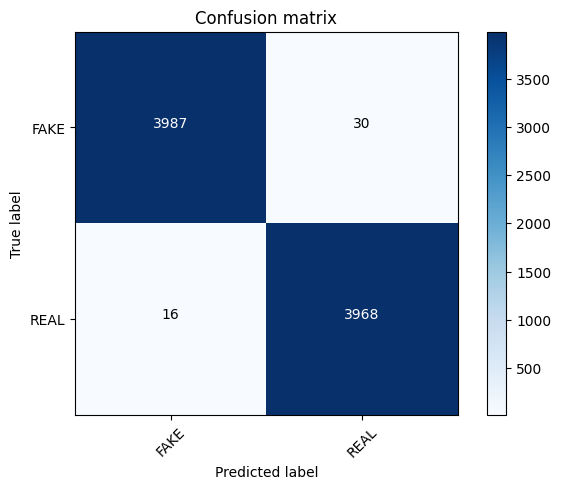

In [44]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

# Create a SVM Classifier
svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
svm_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
svm_score = metrics.accuracy_score(y_test, svm_pred)
print("accuracy:   %0.3f" % svm_score)

# Calculate precision, recall, f1-score and support
report = classification_report(y_test, svm_pred)
print(report)

# Plot the confusion matrix
svm_cm = metrics.confusion_matrix(y_test, svm_pred)
plot_confusion_matrix(svm_cm, classes=['FAKE', 'REAL'])


GRADIENT BOSSTING CLASSFIER

accuracy:   0.994
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4017
           1       0.99      1.00      0.99      3984

    accuracy                           0.99      8001
   macro avg       0.99      0.99      0.99      8001
weighted avg       0.99      0.99      0.99      8001

Confusion matrix, without normalization


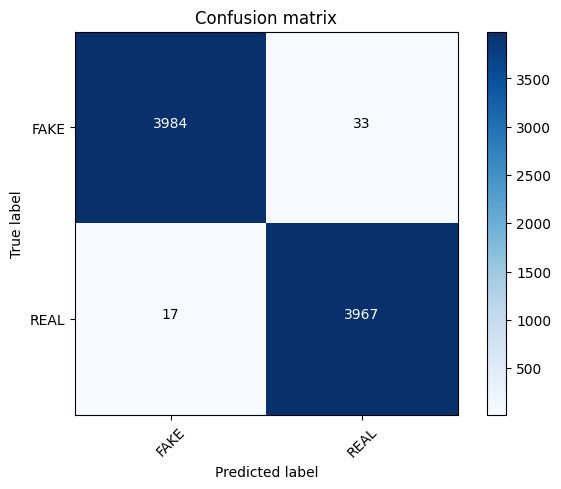

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
gb_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
gb_score = metrics.accuracy_score(y_test, gb_pred)
print("accuracy:   %0.3f" % gb_score)

# Calculate precision, recall, f1-score and support
report = classification_report(y_test, gb_pred)
print(report)

# Plot the confusion matrix
gb_cm = metrics.confusion_matrix(y_test, gb_pred)
plot_confusion_matrix(gb_cm, classes=['FAKE', 'REAL'])


COMAPRISON OF ALL MODEL

Random Forest Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4017
           1       1.00      1.00      1.00      3984

    accuracy                           1.00      8001
   macro avg       1.00      1.00      1.00      8001
weighted avg       1.00      1.00      1.00      8001

Logistic Regression Accuracy: 0.986
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4017
           1       0.98      0.99      0.99      3984

    accuracy                           0.99      8001
   macro avg       0.99      0.99      0.99      8001
weighted avg       0.99      0.99      0.99      8001

Naive Bayes Accuracy: 0.946
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      4017
           1       0.93      0.97      0.95      3984

    accuracy                           0.95      8001
   macro avg       0.95      0.95 

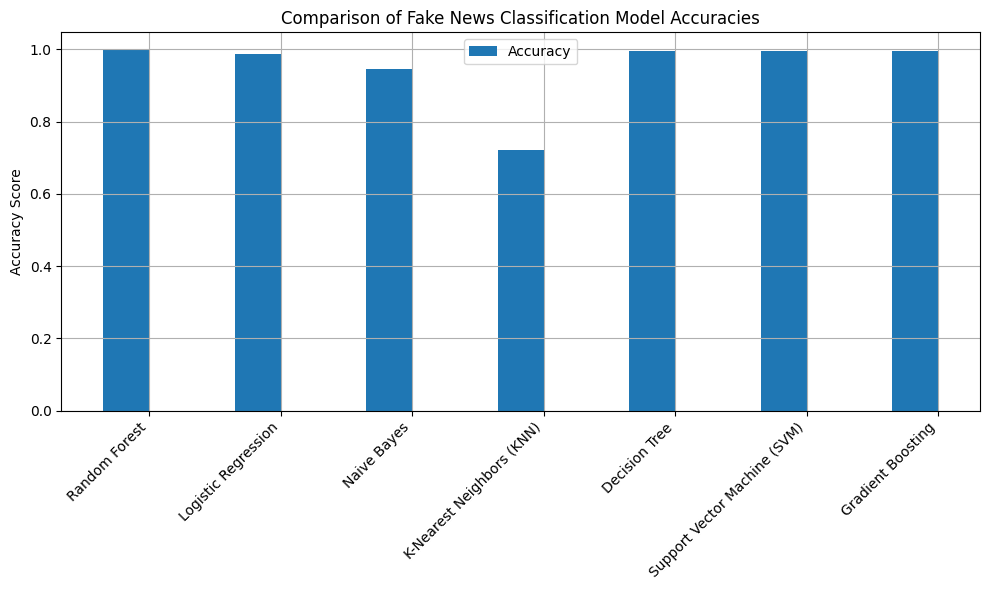

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your training and testing data (X_train, y_train, X_test, y_test)

# Define the different classification models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=2000, random_state=0),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (SVM)": SVC(kernel='linear'),  # Linear Kernel
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train each model and store accuracy scores
accuracy_scores = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)
    print(f"{model_name} Accuracy: {accuracy:.3f}")
    print(classification_report(y_test, pred))

# Create a bar chart to visualize accuracy scores
model_names = list(models.keys())  # Extract model names for the chart
x = np.arange(len(model_names))  # Set bar positions on the x-axis
width = 0.35  # Adjust bar width for better readability

plt.figure(figsize=(10, 6))  # Set figure size for clarity
plt.bar(x - width/2, accuracy_scores, width, label='Accuracy')
plt.xticks(x, model_names, rotation=45, ha='right')  # Rotate x-axis labels for better viewing
plt.ylabel('Accuracy Score')
plt.title('Comparison of Fake News Classification Model Accuracies')
plt.legend()
plt.tight_layout()  # Adjust layout for proper spacing
plt.grid(True)  # Add gridlines for readability

# Display the bar chart
plt.show()


In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm.notebook import tqdm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [49]:
true_news_df = pd.read_csv('../dataset/true.csv')
fake_news_df = pd.read_csv('../dataset/fake.csv')

In [50]:
true_news_df.duplicated().sum()

206

In [51]:
true_news_df.drop_duplicates(inplace=True)

In [52]:
fake_news_df.duplicated().sum()

3

In [53]:
fake_news_df.drop_duplicates(inplace=True)

In [54]:
# Step 4: Combine the datasets
true_news_df['label'] = 'true'
fake_news_df['label'] = 'fake'

In [55]:
combined_df = pd.concat([true_news_df, fake_news_df], ignore_index=True)

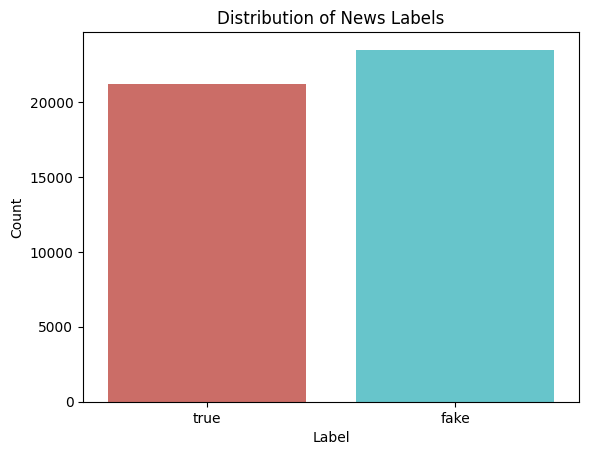

In [56]:
import seaborn as sns

def create_distribution(dataFile):
    return sns.countplot(x='label', data=dataFile, palette='hls')

create_distribution(combined_df)
plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [57]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization
combined_df['text'] = combined_df['text'].apply(word_tokenize)

# Stopword removal and normalization
stop_words = set(stopwords.words('english'))
combined_df['text'] = combined_df['text'].apply(lambda x: [word.lower() for word in x if word.isalpha() and word.lower() not in stop_words])

# Counting word frequency
word_freq = Counter()
combined_df['text'].apply(word_freq.update)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        None
1        None
2        None
3        None
4        None
         ... 
44684    None
44685    None
44686    None
44687    None
44688    None
Name: text, Length: 44689, dtype: object

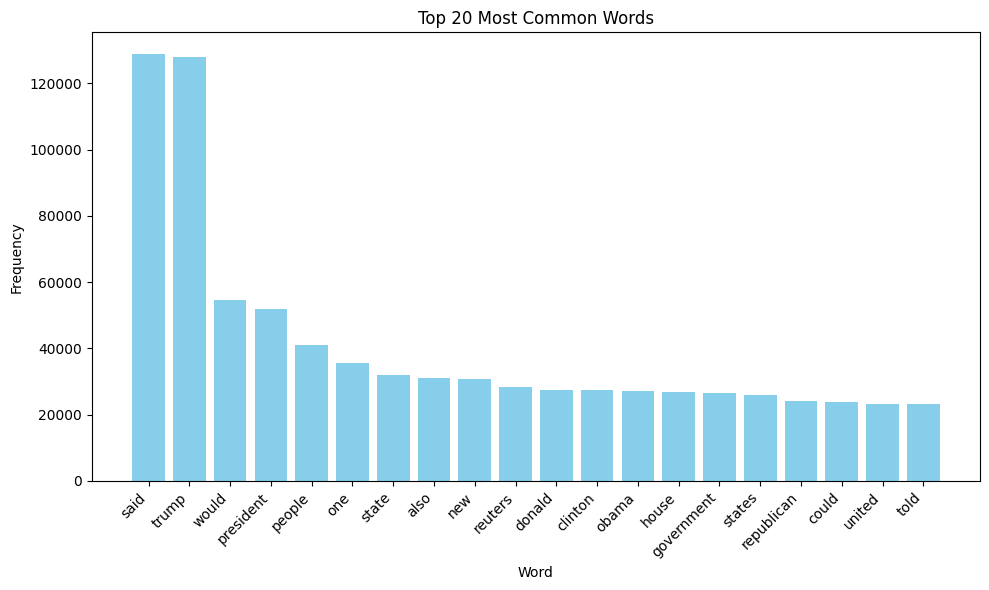

In [58]:
# Visualizing word frequency
plt.figure(figsize=(10, 6))
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [60]:
import pandas as pd

combined_df['date'] = pd.to_datetime(combined_df['date'], dayfirst=True, errors='coerce')

combined_df['Year'] = combined_df['date'].dt.year
combined_df['Month'] = combined_df['date'].dt.month_name()


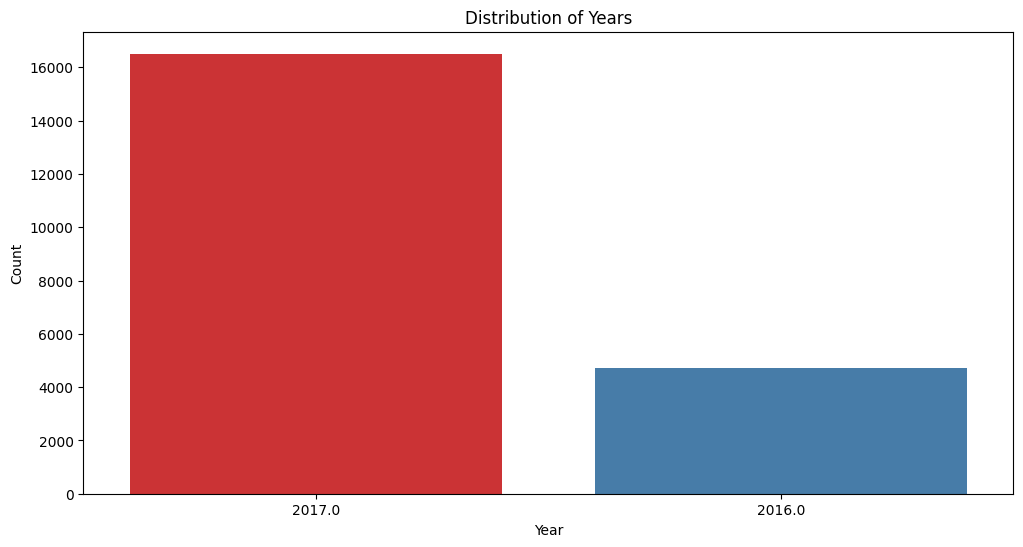

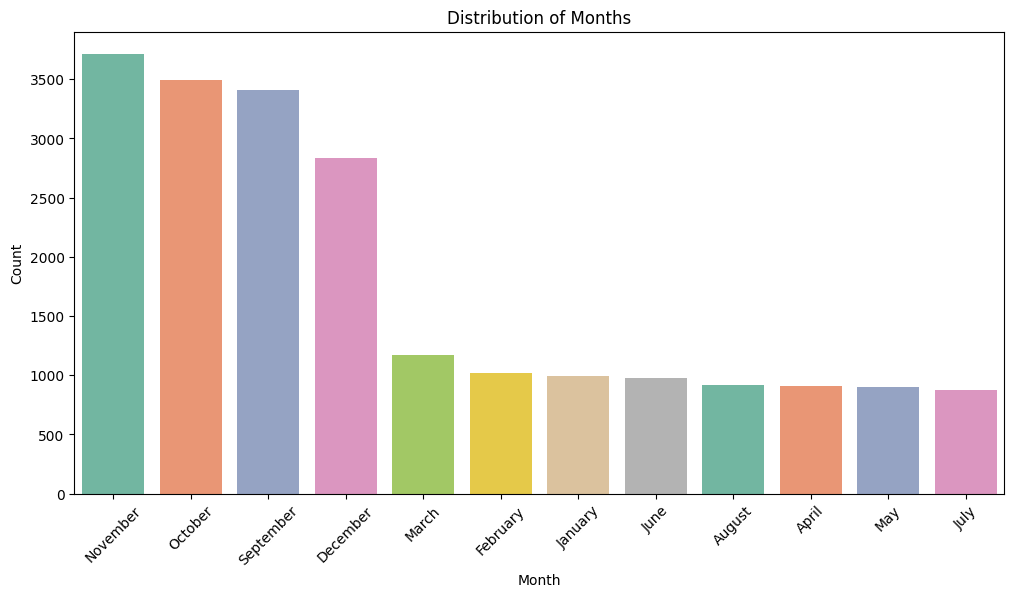

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS

# Distribution of Years
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=combined_df, order=combined_df['Year'].value_counts().index, palette='Set1')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Distribution of Months
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=combined_df, order=pd.DataFrame(combined_df['Month'].value_counts()).index, palette='Set2')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [64]:
print(combined_df.columns)


Index(['title', 'text', 'subject', 'date', 'label', 'Year', 'Month'], dtype='object')


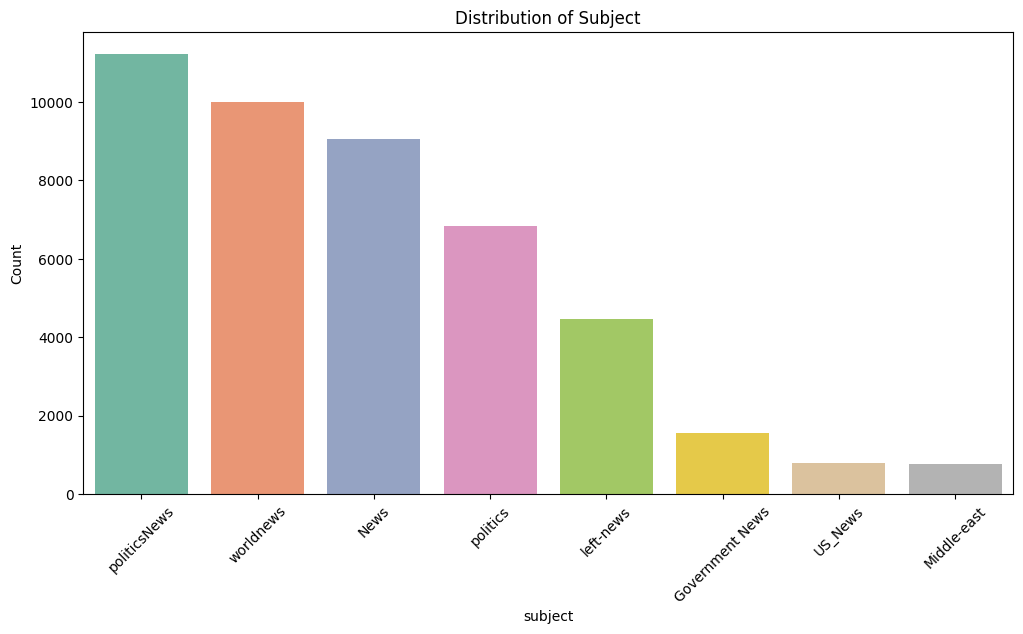

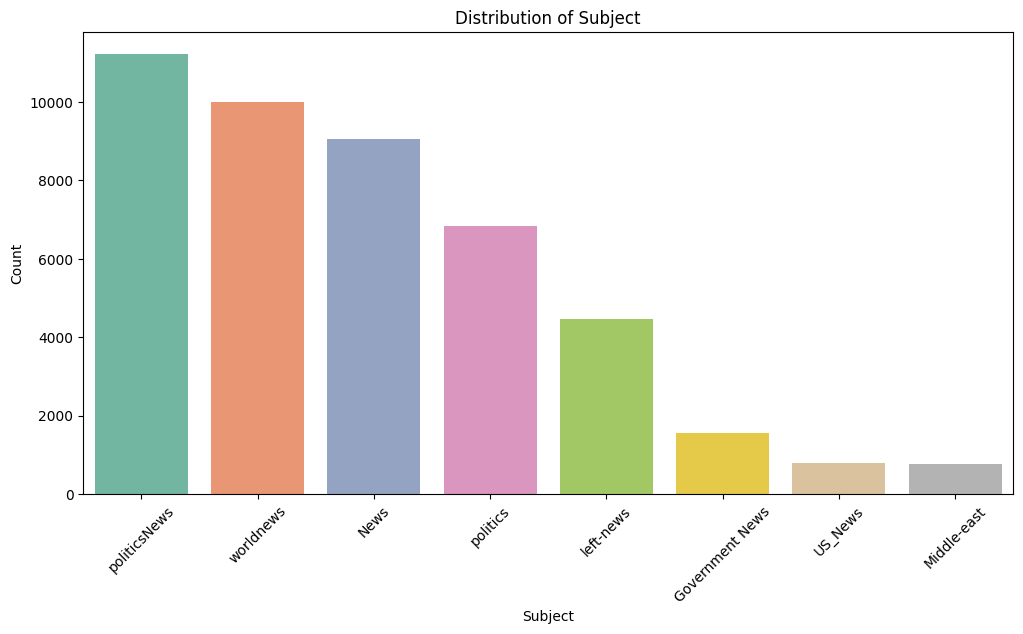

In [65]:

# Distribution of Subject
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=combined_df, order=combined_df['subject'].value_counts().index, palette='Set2')
plt.title('Distribution of Subject')
plt.xlabel('subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis - Relationship between Label and Subject
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=combined_df, order=combined_df['subject'].value_counts().index, palette='Set2')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


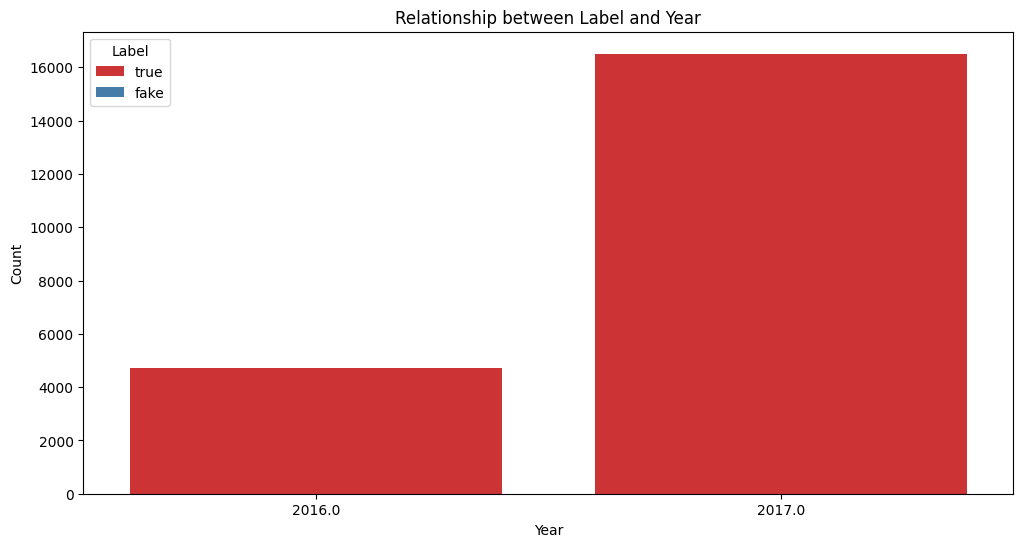

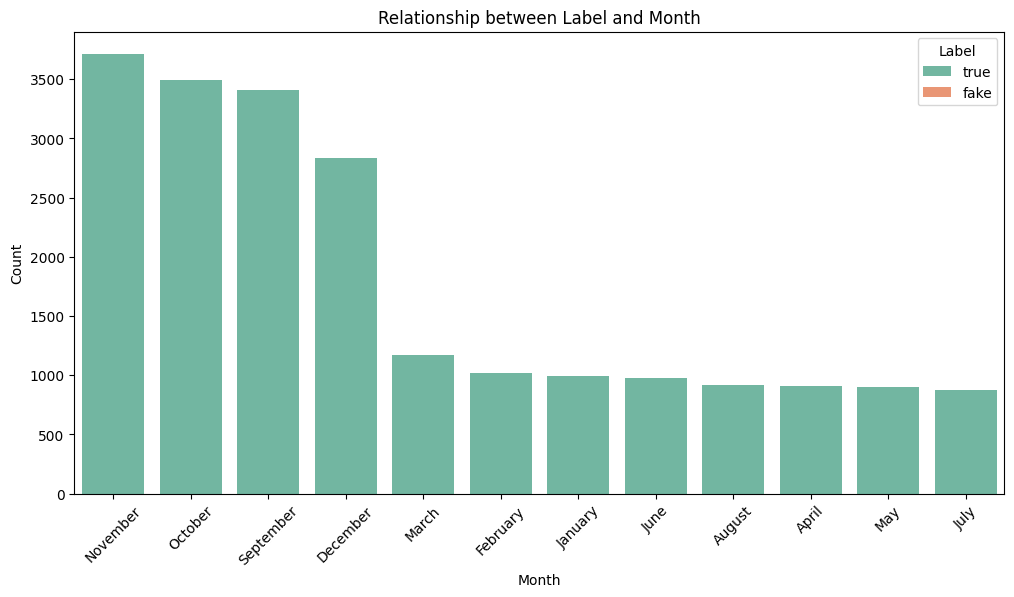

In [66]:

# Bivariate Analysis - Relationship between Label and Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='label', data=combined_df, palette='Set1')
plt.title('Relationship between Label and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.show()

# Bivariate Analysis - Relationship between Label and Month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='label', data=combined_df, palette='Set2', order=pd.DataFrame(combined_df['Month'].value_counts()).index)
plt.title('Relationship between Label and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()


In [67]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [68]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text
combined_df['sentiment'] = combined_df['text'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])

# Display a few rows with sentiment scores
print(combined_df[['text', 'sentiment']].head())

                                                text  sentiment
0  [washington, reuters, head, conservative, repu...     0.9855
1  [washington, reuters, transgender, people, all...     0.9578
2  [washington, reuters, special, counsel, invest...     0.3400
3  [washington, reuters, trump, campaign, adviser...    -0.1761
4  [reuters, president, donald, trump, called, po...     0.9702


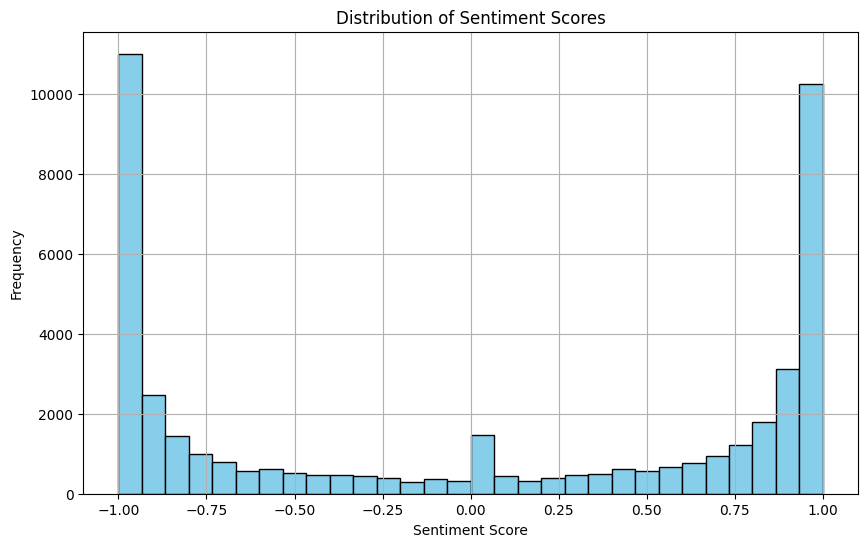

In [69]:
import matplotlib.pyplot as plt

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(combined_df['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


sentiment_category
positive    22197
negative    20958
neutral      1534
Name: count, dtype: int64


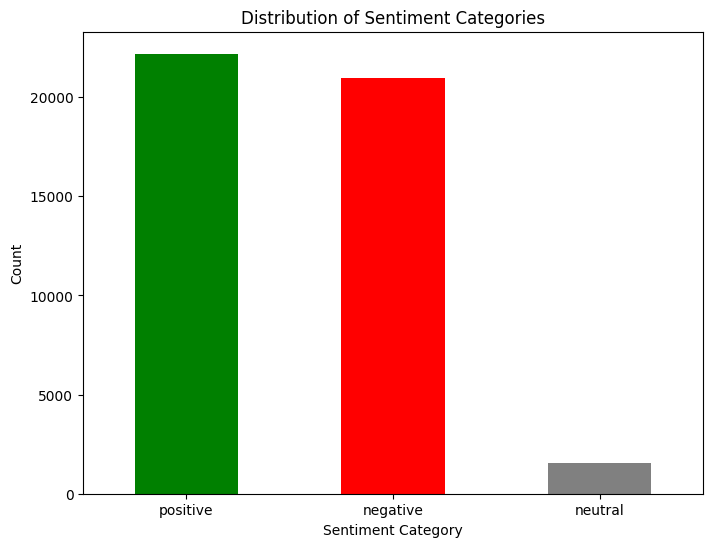

In [70]:
# Define thresholds for sentiment categories
positive_threshold = 0.05
negative_threshold = -0.05

# Categorize sentiment scores into positive, negative, and neutral
combined_df['sentiment_category'] = combined_df['sentiment'].apply(lambda x: 'positive' if x > positive_threshold else ('negative' if x < negative_threshold else 'neutral'))

# Display the count of each sentiment category
print(combined_df['sentiment_category'].value_counts())

# Plotting the distribution of sentiment categories
plt.figure(figsize=(8, 6))
combined_df['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
